# --------Zomato Restaurent Data Analysis---------
### --------------Introduction Of EDA-----------------
Exploratory Data Analysis (EDA) is a crucial step in the data analysis process, where the main goal is to understand the data, uncover patterns, detect anomalies, and test hypotheses. Here are some important points to consider when introducing EDA:

* Understanding the Data: EDA helps in getting familiar with the dataset. This includes understanding the structure, the variables, and the types of data (categorical, numerical, etc.).
* Data Cleaning: During EDA, you often identify missing values, outliers, or errors in the data. Cleaning the data is essential to ensure the accuracy of your analysis.
* Univariate Analysis: This involves examining each variable in the dataset individually. It can include calculating summary statistics (mean, median, mode, variance, etc.) and creating visualizations like histograms or box plots.
* Bivariate/Multivariate Analysis: This step looks at the relationships between two or more variables. Scatter plots, correlation matrices, and cross-tabulations are common tools used here.
* Identifying Patterns and Trends: EDA can reveal trends, patterns, and relationships that might not be immediately apparent. This can guide further analysis and model building.
* Hypothesis Generation: The insights gained from EDA can help in forming hypotheses that can be tested with more formal statistical methods.
* Data Visualization: Visual representations of the data are a key component of EDA. They make complex data more accessible, understandable, and usable.
* Assumptions for Statistical Models: EDA helps in checking the assumptions required for statistical models, such as normality, homoscedasticity, and linearity.
* Feature Engineering: Insights from EDA can lead to the creation of new variables that may be more predictive in statistical models or machine learning algorithms.
* Reporting: Documenting the findings from EDA is important for sharing insights with stakeholders and for guiding the next steps in the data analysis process.



## Import Important package and data for analysis..

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv('C:\\Users\\LENOVO\\Desktop\\powerBI works\\New folder\\zomato_dataset.csv')
df.head(2)

,Restaurant_Name,Dining_Rating,Delivery_Rating,Dining Votes,Delivery_Votes,Cuisine,Place_Name,City,Item_Name,Best_Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0


# Check Basic Statement...

In [62]:

print(df.isnull().sum())

# Get basic statistics
print(df.describe())

# Check unique values in categorical columns
print(df['City'].unique())

Restaurant_Name        0
Dining_Rating      32236
Delivery_Rating     1280
Dining Votes           0
Delivery_Votes         0
Cuisine                0
Place_Name             0
City                   0
Item_Name              0
Best_Seller        95715
Votes                  0
Prices                 0
dtype: int64
       Dining_Rating  Delivery_Rating   Dining Votes  Delivery_Votes  \
count   91421.000000    122377.000000  123657.000000   123657.000000   
mean        3.822264         3.963184     152.729858      115.763725   
std         0.408693         0.245900     232.214061      243.970828   
min         2.500000         2.500000       0.000000        0.000000   
25%         3.600000         3.800000       0.000000        0.000000   
50%         3.900000         4.000000      30.000000        0.000000   
75%         4.100000         4.100000     217.000000       23.000000   
max         4.800000         4.600000     997.000000      983.000000   

               Votes         Prices  


# Data cleaning--

In [63]:
# Fill missing values in 'Best_Seller' column
df.fillna({'Best_Seller': 'Not Specified'}, inplace=True)
# Drop rows with missing 'Prices'
df.dropna(subset=['Prices'], inplace=True)
df.fillna({
    "Dining_Rating": df["Dining_Rating"].mean(),
    "Delivery_Rating": df["Delivery_Rating"].mean()
}, inplace=True)

In [64]:
df.isna().sum()

Restaurant_Name    0
Dining_Rating      0
Delivery_Rating    0
Dining Votes       0
Delivery_Votes     0
Cuisine            0
Place_Name         0
City               0
Item_Name          0
Best_Seller        0
Votes              0
Prices             0
dtype: int64

# Data visualization-----

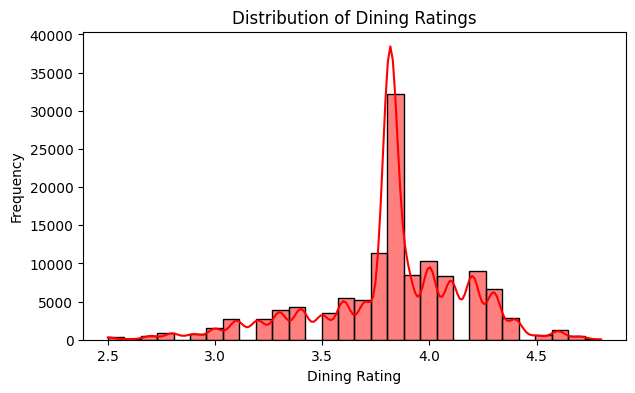

count    123657.000000
mean          3.822264
std           0.351407
min           2.500000
25%           3.700000
50%           3.822264
75%           4.000000
max           4.800000
Name: Dining_Rating, dtype: float64


In [65]:
plt.figure(figsize=(7, 4))
sns.histplot(df['Dining_Rating'], kde=True, bins=30,color="red")
plt.title('Distribution of Dining Ratings')
plt.xlabel('Dining Rating')
plt.ylabel('Frequency')
plt.show()
print(df['Dining_Rating'].describe())

## Observation--
* The average dining rating across all restaurants is 3.8 .
* The highest dining rating is 4.8, while the lowest is 2.5 .
* we can see here most of the dining rating are present in 3.8 to 4.0 .

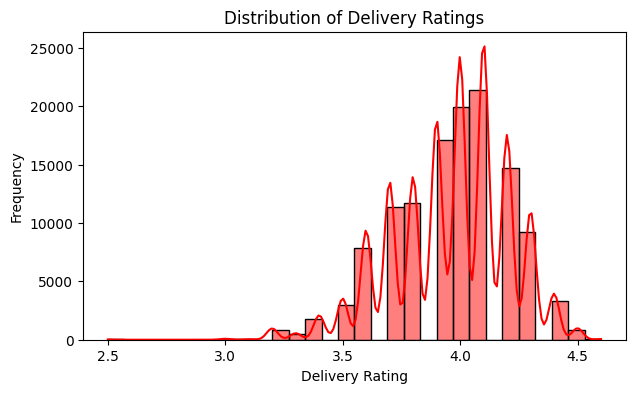

In [66]:
plt.figure(figsize=(7,4))
sns.histplot(df['Delivery_Rating'], kde=True, bins=30, color='red')
plt.title('Distribution of Delivery Ratings')
plt.xlabel('Delivery Rating')
plt.ylabel('Frequency')
plt.show()

## Observation---
* The average delivery rating is 4.0.
* The highest delivery rating is 4.2 (e.g., Doner King), while the lowest is 3.7 (e.g., Taco Bell).
* Delivery ratings are generally consistent with dining ratings, but some restaurants perform better in one area than the other.

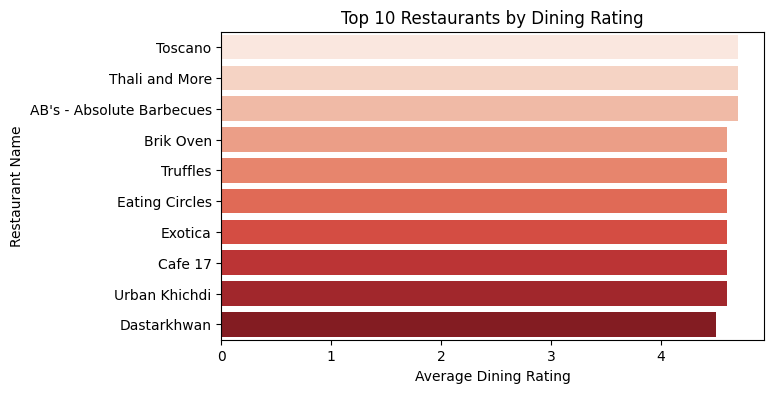

In [67]:
top_restaurants = df.groupby('Restaurant_Name')['Dining_Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(7,4))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index,hue=top_restaurants.index,palette='Reds')
plt.title('Top 10 Restaurants by Dining Rating')
plt.xlabel('Average Dining Rating')
plt.ylabel('Restaurant Name')
plt.show()

## observation--
* we can see here Toscano, Thali and More and AB's are top most resturent according to dining rating.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13768\237836648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_delivery_restaurants.values, y=top_delivery_restaurants.index, palette='Reds')


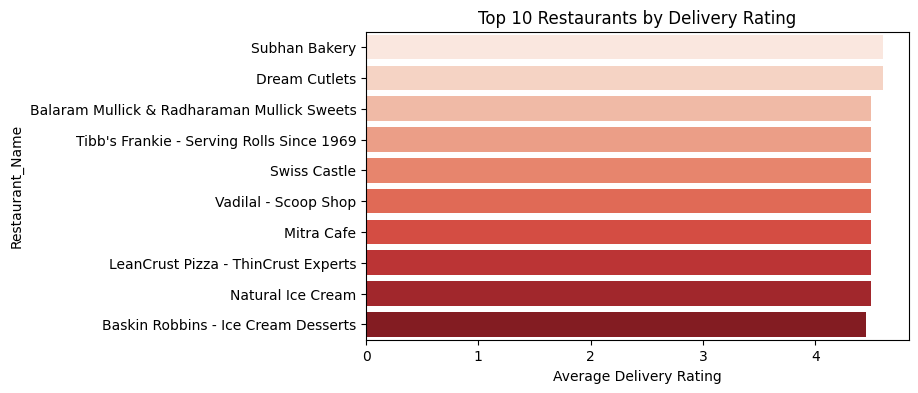

In [91]:
top_delivery_restaurants = df.groupby('Restaurant_Name')['Delivery_Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(7,4))
sns.barplot(x=top_delivery_restaurants.values, y=top_delivery_restaurants.index, palette='Reds')
plt.title('Top 10 Restaurants by Delivery Rating')
plt.xlabel('Average Delivery Rating')
plt.show()

## Observation--
* Subhan Bakery and Dream Cutlets are top resturent based on delivery rating.

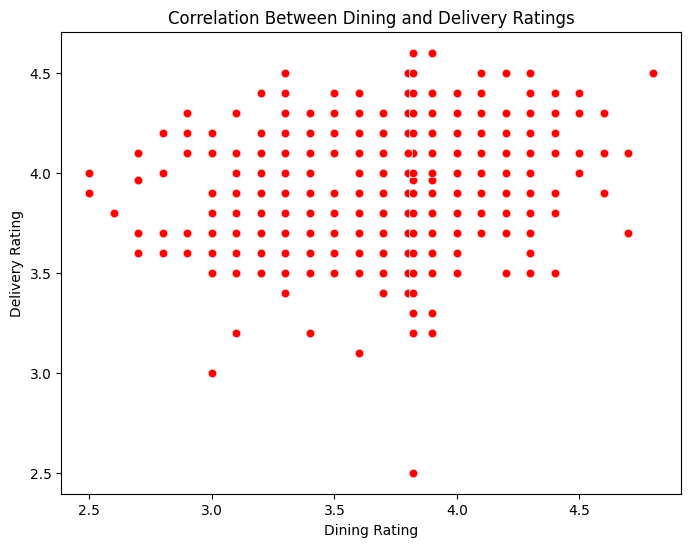

In [92]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Dining_Rating', y='Delivery_Rating', data=df, alpha=0.6, color='red')
plt.title('Correlation Between Dining and Delivery Ratings')
plt.xlabel('Dining Rating')
plt.ylabel('Delivery Rating')
plt.show()

## Observation---
* we can easily show here most of the common relation are creating 3.5 to 4.0 rating position.

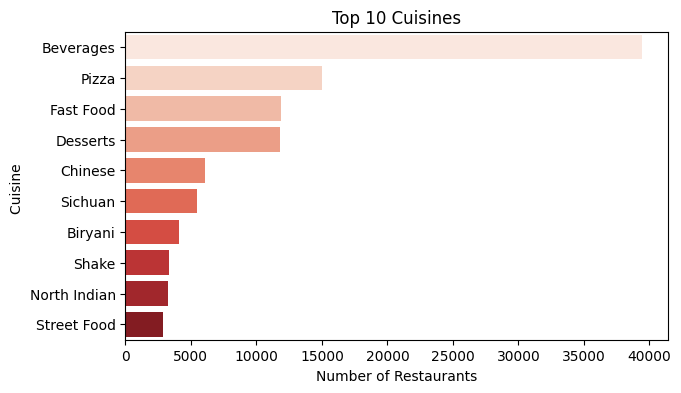

In [68]:
cuisine_distribution = df['Cuisine '].value_counts().head(10)
plt.figure(figsize=(7,4))
sns.barplot(x=cuisine_distribution.values, y=cuisine_distribution.index,hue=cuisine_distribution.index, palette='Reds')
plt.title('Top 10 Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine ')
plt.show()

## Observation---
* Beverages and Fast Food is the most common cuisine type .
* Biryani is another popular cuisine, especially in Hyderabad, with restaurants like Crystal Restaurant & Bar and Papadams Blue.
* Desserts and Chinese cuisine is also well-represented .

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13768\873837825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_sellers.values, y=best_sellers.index, palette='plasma')


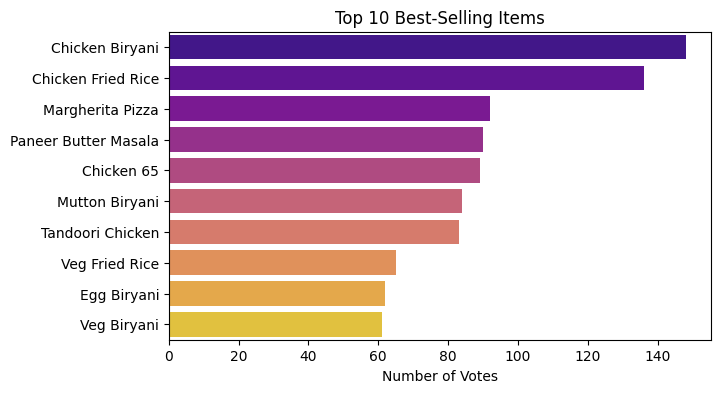

In [69]:
best_sellers = df[df['Best_Seller'] == 'BESTSELLER']['Item_Name'].value_counts().head(10)
plt.figure(figsize=(7,4))
sns.barplot(x=best_sellers.values, y=best_sellers.index, palette='plasma')
plt.title('Top 10 Best-Selling Items')
plt.xlabel('Number of Votes')
plt.ylabel("")
plt.show()

## Observation--
* Chicken Biryani is top selling items .
* Next popular item is Chicken friedrice .
* Margherita Pizza is 3rd most popular items and 10th popular items is veg biryani.

### Trends in Best-Sellers:
* Chicken-based dishes dominate the best-seller lists across multiple restaurants.
* Vegetarian options like Paneer Butter Masala and Veg Manchurian are also popular, especially in Indian and Chinese cuisines.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13768\3525857948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuisine ',y='Prices',data=filtered_df,palette='Reds')


count    123657.000000
mean        241.378399
std         192.830713
min           0.950000
25%         130.000000
50%         208.570000
75%         299.000000
max       12024.000000
Name: Prices, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13768\3525857948.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Restaurant_Name', y='Prices', data=df[df['Restaurant_Name'].isin(top_restaurants.index)], palette='Set2')


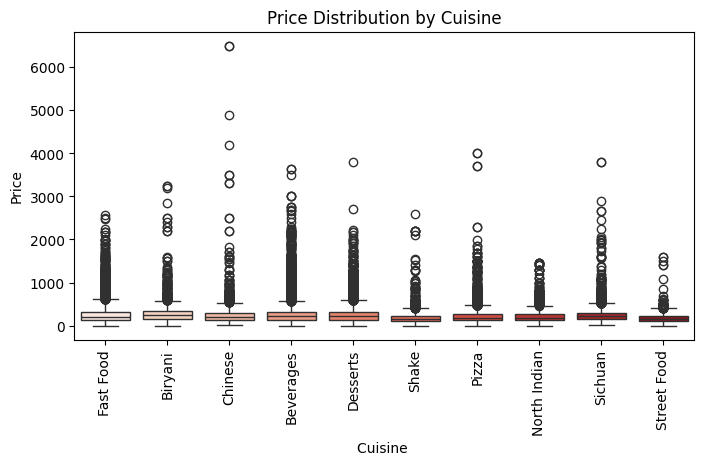

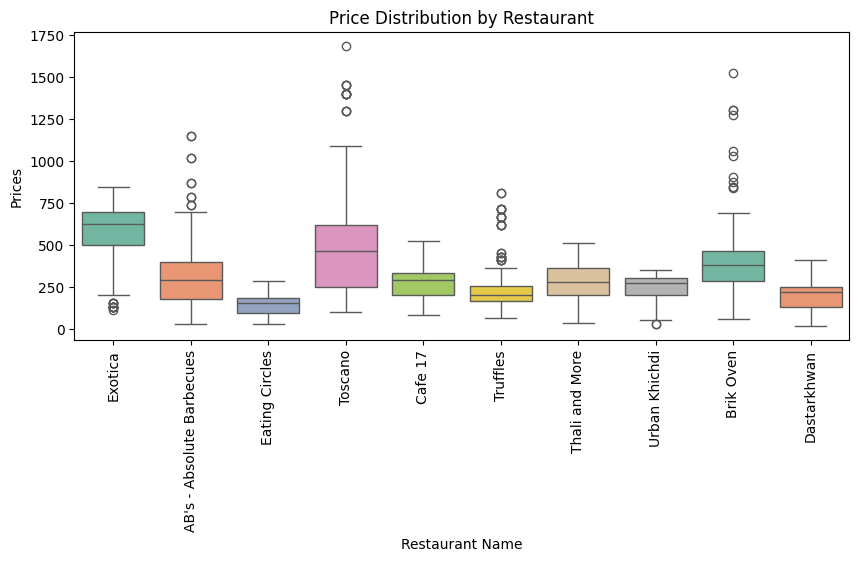

In [88]:
plt.figure(figsize=(8, 4))
filtered_df = df[df['Cuisine '].isin(cuisine_distribution.index)]
sns.boxplot(x='Cuisine ',y='Prices',data=filtered_df,palette='Reds')

plt.title('Price Distribution by Cuisine')
plt.xlabel('Cuisine ')
plt.ylabel('Price')
plt.xticks(rotation=90) 
#plt.show()
print(df["Prices"].describe())

plt.figure(figsize=(10,4))
sns.boxplot(x='Restaurant_Name', y='Prices', data=df[df['Restaurant_Name'].isin(top_restaurants.index)], palette='Set2')
plt.title('Price Distribution by Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.show()

## Observation----
### Average Prices:

* The average price of items across all restaurants is ₹200–₹300.
* Fast food items (e.g., burgers, pizzas) are generally cheaper, with prices ranging from ₹70–₹200.
* Biryani and non-vegetarian dishes are more expensive, with prices ranging from ₹250–₹600.

### Most Expensive price:
72760  Bakra Massallam [8 kg] in Arsalan which priced at ₹12024, making it the most expensive item in the dataset.

### Affordable Options:

* Veg Puff at BrownBear is one of the cheapest items, priced at ₹25.
* French Fries at Doner King are priced at ₹175.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13768\4107767717.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='Prices', data=df, palette='Set2')


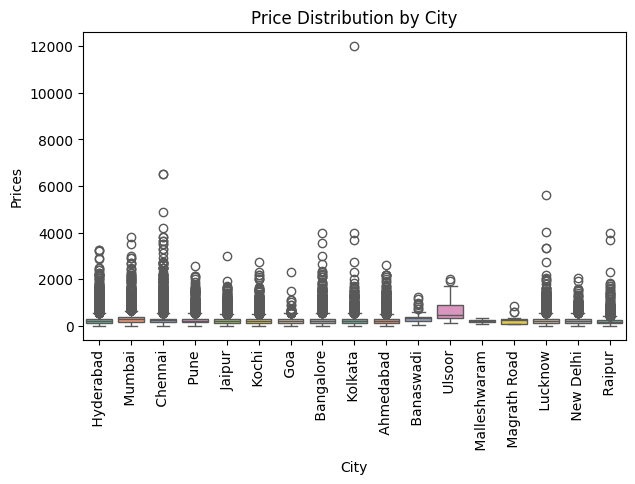

In [74]:
plt.figure(figsize=(7,4))
sns.boxplot(x='City', y='Prices', data=df, palette='Set2')
plt.title('Price Distribution by City')
plt.xlabel('City')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.show()

## Observation----
* according to this data set we can see here Chennai,Bangalore,Mumbai and Hydrabad is more expencive than another city.
* kolkata and lucknow are some outlair showing here.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13768\2231890905.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_cuisine.values, y=avg_price_by_cuisine.index, palette='Reds')


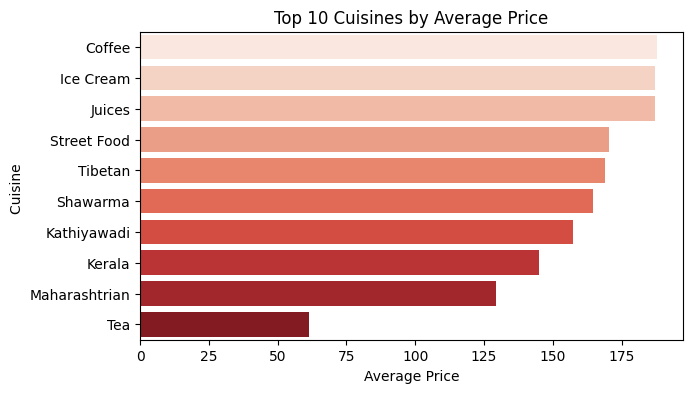

In [104]:
avg_price_by_cuisine = df.groupby('Cuisine ')['Prices'].mean().sort_values(ascending=False).tail(10)
plt.figure(figsize=(7,4))
sns.barplot(x=avg_price_by_cuisine.values, y=avg_price_by_cuisine.index, palette='Reds')
plt.title('Top 10 Cuisines by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Cuisine ')
plt.show()

## Observation ---
* according to average price Deseert,Beverages,Tea and sandwich are more pocketfriendly than another items.
* most expencive is sea food and Chinese.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13768\2385476301.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_voted_restaurants.values, y=top_voted_restaurants.index, palette='rocket')


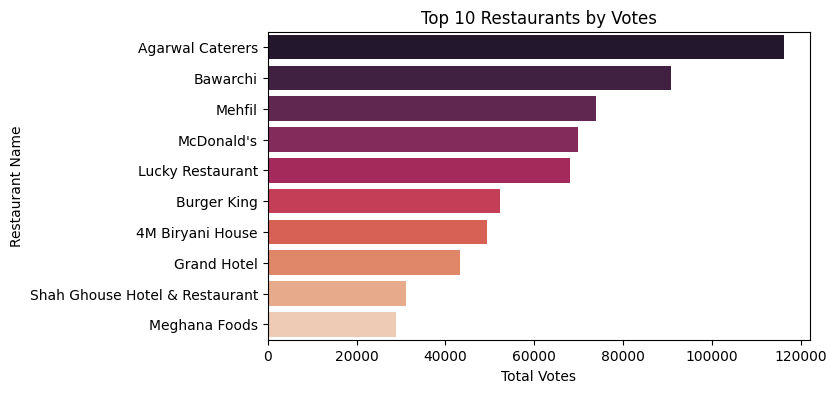

In [106]:
top_voted_restaurants = df.groupby('Restaurant_Name')['Votes'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(7,4))
sns.barplot(x=top_voted_restaurants.values, y=top_voted_restaurants.index, palette='rocket')
plt.title('Top 10 Restaurants by Votes')
plt.xlabel('Total Votes')
plt.ylabel('Restaurant Name')
plt.show()

## Observation----
* Top restaurant according to customers vote is Agarwal Caterers.

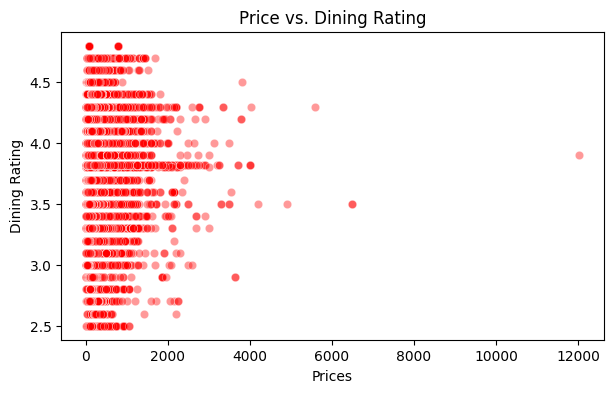

In [111]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='Prices', y='Dining_Rating', data=df, color='red', alpha=0.4)
plt.title('Price vs. Dining Rating')
plt.xlabel('Prices')
plt.ylabel('Dining Rating')
plt.show()

## Observation---
* There is no strong relationship between price and dining rating. Higher-priced items do not necessarily have higher dining ratings.
* Most items are clustered in the ₹100–₹500 price range with dining ratings between 3.8–4.4.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13768\3923997926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_distribution.values, y=city_distribution.index, palette='cool')


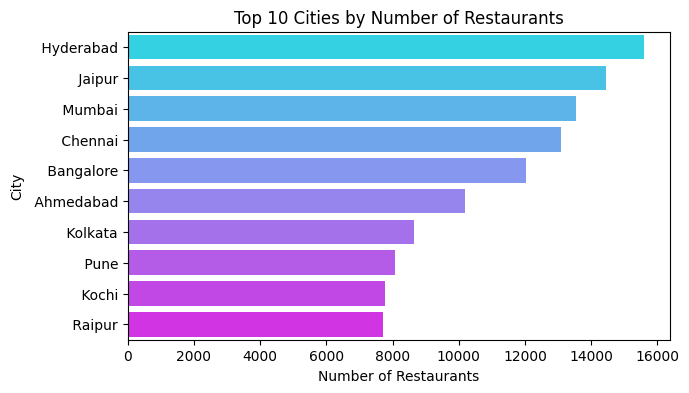

In [78]:
city_distribution = df['City'].value_counts().head(10)
plt.figure(figsize=(7,4))
sns.barplot(x=city_distribution.values, y=city_distribution.index, palette='cool')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

## Observation---
* according to this data we can show here Maximum resturants located in Hyderabad and then jaipur and mumbai.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13768\3526836306.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Best_Seller', y='Prices', data=df, palette='Set3')


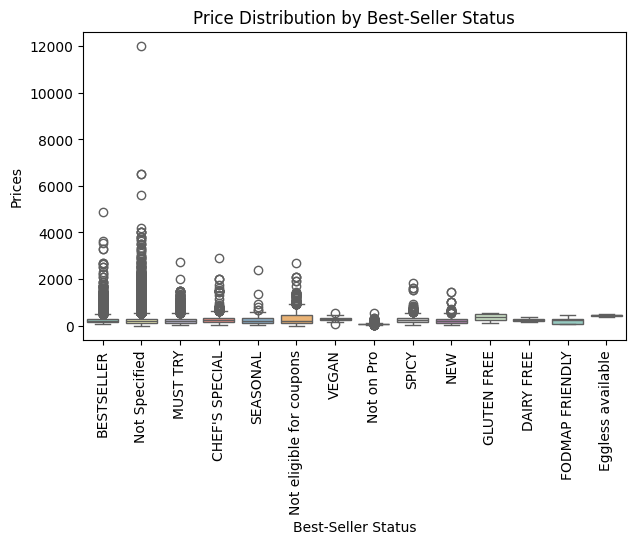

In [80]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Best_Seller', y='Prices', data=df, palette='Set3')
plt.title('Price Distribution by Best-Seller Status')
plt.xlabel('Best-Seller Status')
plt.ylabel('Prices')
plt.xticks(rotation=90)
plt.show()

## Observation--
* according to this data we replace null with Not specified,here based on price Not specified is too high..and ther BESTSELLER.
  

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13768\1683879406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items_by_votes.values, y=top_items_by_votes.index, palette='mako')


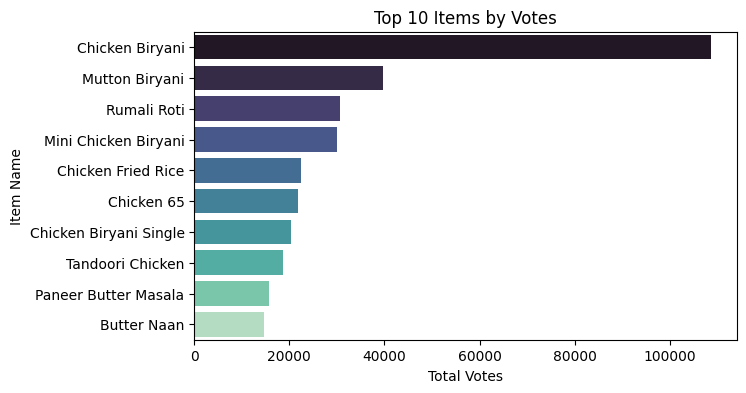

In [81]:
top_items_by_votes = df.groupby('Item_Name')['Votes'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(7,4))
sns.barplot(x=top_items_by_votes.values, y=top_items_by_votes.index, palette='mako')
plt.title('Top 10 Items by Votes')
plt.xlabel('Total Votes')
plt.ylabel('Item Name')
plt.show()

## Observation---
* we can show here Chicken biryani is ome of the most popular item according to total votes.
* mutton biryani is 2nd popular items.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13768\2794368010.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_restaurant.values, y=avg_price_by_restaurant.index, palette='viridis')


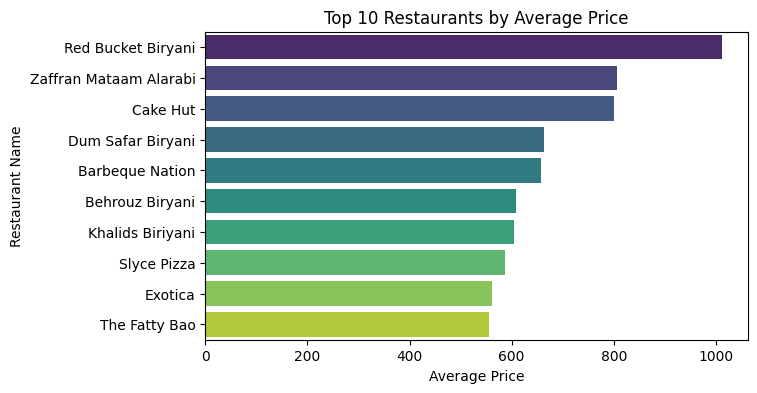

In [84]:
avg_price_by_restaurant = df.groupby('Restaurant_Name')['Prices'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(7,4))
sns.barplot(x=avg_price_by_restaurant.values, y=avg_price_by_restaurant.index, palette='viridis')
plt.title('Top 10 Restaurants by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Restaurant Name')
plt.show()

## Observation----
Red Bucket Biryani is most topest resturent according to average price.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13768\1317888116.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_seller_restaurants.values, y=best_seller_restaurants.index, palette='rocket')


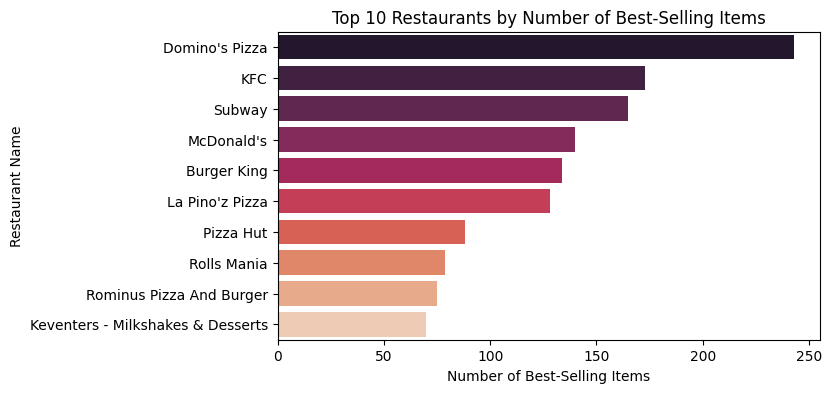

In [85]:
best_seller_restaurants = df[df['Best_Seller'] == 'BESTSELLER']['Restaurant_Name'].value_counts().head(10)
plt.figure(figsize=(7,4))
sns.barplot(x=best_seller_restaurants.values, y=best_seller_restaurants.index, palette='rocket')
plt.title('Top 10 Restaurants by Number of Best-Selling Items')
plt.xlabel('Number of Best-Selling Items')
plt.ylabel('Restaurant Name')
plt.show()

## observation----
Zomato Top selling items comes from Domino's Pizza and then KFC.

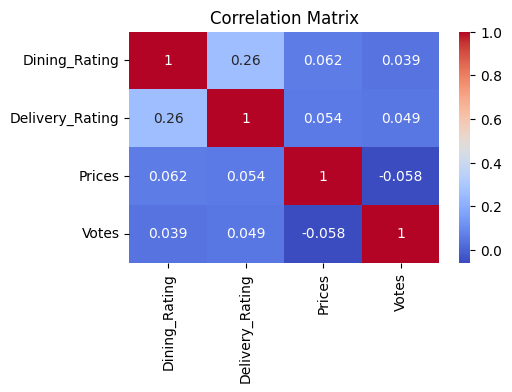

In [115]:
plt.figure(figsize=(5,3))
sns.heatmap(df[['Dining_Rating', 'Delivery_Rating', 'Prices', 'Votes']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Observation---
* Dining and Delivery Ratings are positively correlated, indicating that restaurants performing well in one area tend to perform well in the other.
* Prices do not significantly impact dining or delivery ratings, suggesting that customers prioritize quality and experience over cost.
* Votes are positively correlated with both dining and delivery ratings, indicating that satisfied customers are more likely to leave reviews.
* No strong relationship exists between prices and votes, meaning expensive items do not necessarily attract more attention or reviews.

# ----------------------Summary-----------------------

* ### Customer Satisfaction: Dining ratings are generally higher than delivery ratings, indicating room for improvement in delivery services.

* ### Popular Cuisines: Fast food, Indian, and Chinese cuisines dominate the market.

* ### Pricing Strategies: Mid-priced items with good quality tend to be the most popular.

* ### City-wise Trends: Metropolitan cities have more restaurants and higher competition, while smaller cities offer growth opportunities.

* ### Best-Selling Items: Items like biryani, pizza, and paneer dishes are highly popular.



# --------One-Liner Summary for Zomato--------
## "By focusing on delivery improvements, popular cuisines, competitive pricing, and customer engagement, Zomato can enhance user satisfaction, attract more restaurants, and expand its market presence."